In [5481]:
# 0. 필요한 라이브러리 호출(+ 한글폰트 설치)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plt
import platform
from matplotlib import font_manager, rc

# 한글 폰트 설치 
if platform.system() == 'Darwin':   #macOS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':   #WINDOWS
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:   #LINUX
    print('Unknown system... sorry~~~~') 
    

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 

In [5482]:
# 데이터 읽어와서 전처리하기
# 컬럼확인부터

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5483]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5484]:
# name,ticket,cabin 삭제 
# 결측치 채우기 
# family추가 agebin/farebin 추가
# agebin/farebin/embarked 수치화

# 스케일링
# 데이터분리 
# 학습 
# 예측 

In [5485]:
train = train.drop(['Ticket','Cabin'],axis=1)
test = test.drop(['Ticket','Cabin'],axis=1)

In [5486]:
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [5487]:
test['Initial']=0
for i in test:
    test['Initial']=test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [5488]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Dona','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_18332\2147173843.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Dona','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],


In [5489]:
test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Dona','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_18332\706611241.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Dona','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],


In [5490]:
train.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [5491]:
test.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     7.406471
Miss      21.774844
Mr        32.114130
Mrs       38.904762
Other     42.750000
Name: Age, dtype: float64

In [5492]:
## Assigning the NaN Values with the Ceil values of the mean ages
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

In [5493]:
## Assigning the NaN Values with the Ceil values of the mean ages
test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age']=33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age']=36
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age']=5
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age']=46
test.loc[(test.Age.isnull()),'Age']=30

In [5494]:
initial_replacement = train['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4])
train['Initial'] = initial_replacement

initial_replacement = test['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4])
test['Initial'] = initial_replacement

C:\Users\user\AppData\Local\Temp\ipykernel_18332\2863900649.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  initial_replacement = train['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4])
C:\Users\user\AppData\Local\Temp\ipykernel_18332\2863900649.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  initial_replacement = test['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4])


In [5495]:
train.Age.isnull().any() #So no null values left finally 

False

In [5496]:
test.Age.isnull().any() #So no null values left finally 
null_age_rows = test[test['Age'].isnull()]
null_age_rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial


In [5497]:
# # 타이틀 추출 함수 정의
# def extract_title(name):
#     return name.split(',')[1].split('.')[0].strip()

# # Title 열 생성
# train['Title'] = train['Name'].apply(extract_title)
# test['Title'] = test['Name'].apply(extract_title)

# # 추출된 타이틀 확인
# print(train['Title'].value_counts())

In [5498]:
# # 타이틀을 주요 카테고리로 그룹화하는 함수 정의
# def simplify_title(title):
#     if title in ['Capt', 'Col', 'Major', 'Dr', 'Rev']:
#         return 1
#     elif title in ['Jonkheer', 'Don', 'Sir', 'Countess', 'Dona', 'Lady', 'Partner']:
#         return 2
#     elif title in ['Mme', 'Ms', 'Mrs']:
#         return 3
#     elif title in ['Mlle', 'Miss']:
#         return 4
#     elif title == 'Mr':
#         return 5
#     elif title == 'Master':
#         return 6
#     else:
#         return 7

# # 기존의 'Name' 컬럼에서 타이틀을 추출한 후 숫자값으로 변환하여 'Title' 컬럼에 저장
# train['Title'] = train['Name'].apply(lambda name: simplify_title(name.split(',')[1].split('.')[0].strip()))
# test['Title'] = test['Name'].apply(lambda name: simplify_title(name.split(',')[1].split('.')[0].strip()))

# # 결과 확인
# print(train[['Name', 'Title']].head())
# print(train['Title'].value_counts())

In [5499]:

# test['Title'] = test['Title'].astype(int)
# train['Title'] = train['Title'].astype(int)


# # Name 컬럼 제거
train = train.drop(columns=['Name'])
test = test.drop(columns=['Name'])

# # 결과 확인
# print(train.head())

In [5500]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Initial        0
dtype: int64

In [5501]:
train.isnull().sum()

# 나이결측치 평균으로 채우기 

# train['Age'] = train['Age'].fillna(train['Age'].mean())
# test['Age'] = test['Age'].fillna(test['Age'].mean())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Initial        0
dtype: int64

In [5502]:
test.info()
# fare 결측치 
# 3등석이었는데 3등석의 평균가격으로 채우기 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   Initial      418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [5503]:
train.info()
# embarked 결측치는 최빈값으로 채우기 s였음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Initial      891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [5504]:
mean_fare_pclass3 = test.loc[test['Pclass'] == 3, 'Fare'].mean()

test['Fare'] = test['Fare'].fillna(mean_fare_pclass3)

In [5505]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Initial      418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [5506]:
mode_embark = train['Embarked'].mode()[0]
mode_embark

'S'

In [5507]:
train['Embarked'] = train['Embarked'].fillna(mode_embark)

In [5508]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Initial      891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [5509]:
# family추가 isAlone/agebin/farebin 추가
# agebin/farebin/embarked 수치화

# 스케일링
# 데이터분리 
# 학습 
# 예측 

In [5510]:
# family추가 agebin/farebin 추가

train['Family'] = train['SibSp'] + train['Parch'] + 1

In [5511]:
test['Family'] = test['SibSp'] + test['Parch'] + 1

In [5512]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Initial      891 non-null    int64  
 10  Family       891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [5513]:
isAlone = train['Family'] == 1 

train['isAlone'] = isAlone

In [5514]:
isAlone = test['Family'] == 1 

test['isAlone'] = isAlone

In [5515]:
train['Age'].isnull().sum()
a = test['Age'].isnull()
a.idxmax()

0

In [5516]:
# bins = [0, 12, 19, 35, 60, 100]

# # 각 범주에 대한 이름을 지정합니다.
# labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']

# # 'Age' 열을 기준으로 새로운 'AgeGroup' 열을 생성합니다.
# train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

# # 결과 확인
# train[['Age', 'AgeGroup']].head()

In [5517]:
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

# 나이 구간 정의
bins = [0, 15, 25, 35, 50, 90]

# 각 범주에 대한 이름을 지정합니다.
labels = [0, 1, 2, 3, 4]

# bins = [0,10,20,30,40,50,60,70,80,90,100]

# # 각 범주에 대한 이름을 지정합니다.
# labels = [0,1,2,3,4,5,6,7,8,9]

# 'Age' 열을 기준으로 새로운 'AgeGroup' 열을 생성합니다.
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

# 결과 확인
train[['Age', 'AgeGroup']].head()

,Age,AgeGroup
0,22,1
1,38,3
2,26,2
3,35,3
4,35,3


In [5518]:
bins = [0,15,25,35,50,90]

# 각 범주에 대한 이름을 지정합니다.
labels = [0,1,2,3,4]

# bins = [0,10,20,30,40,50,60,70,80,90,100]

# # 각 범주에 대한 이름을 지정합니다.
# labels = [0,1,2,3,4,5,6,7,8,9]

# 'Age' 열을 기준으로 새로운 'AgeGroup' 열을 생성합니다.
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

# 결과 확인
test[['Age', 'AgeGroup']].head()

,Age,AgeGroup
0,34,2
1,47,3
2,62,4
3,27,2
4,22,1


In [5519]:
train['AgeGroup'] = train['AgeGroup'].astype(int)
test['AgeGroup'] = test['AgeGroup'].astype(int)

In [5520]:
# 요금에 로그 변환 적용 (로그 변환을 위해 1을 더해 0값 방지)
train['Fare_Log'] = train['Fare'].map(lambda x: np.log(x+1))

# # 로그 변환된 요금을 4분위수로 범주화
# train['FareBand'] = pd.qcut(train['Fare_Log'], q=4, labels=[0,1,2,3])
# train['FareBand']  = train['FareBand'].astype(int)
# # 결과 확인
# train[['Fare', 'Fare_Log', 'FareBand']].head(10)

In [5521]:
# 요금에 로그 변환 적용 (로그 변환을 위해 1을 더해 0값 방지)
test['Fare_Log'] = test['Fare'].map(lambda x: np.log(x+1))

# # 로그 변환된 요금을 4분위수로 범주화
# test['FareBand'] = pd.qcut(test['Fare_Log'], q=4, labels=[0,1,2,3])
# test['FareBand'] = test['FareBand'].astype(int)
# # 결과 확인
# test[['Fare', 'Fare_Log', 'FareBand']].head(10)

In [5522]:
train= pd.get_dummies(train, columns=['Embarked'])


In [5523]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Initial,Family,isAlone,AgeGroup,Fare_Log,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22,1,0,7.2500,0,2,False,1,2.110213,False,False,True
1,2,1,1,female,38,1,0,71.2833,1,2,False,3,4.280593,True,False,False
2,3,1,3,female,26,0,0,7.9250,2,1,True,2,2.188856,False,False,True
3,4,1,1,female,35,1,0,53.1000,1,2,False,3,3.990834,False,False,True
4,5,0,3,male,35,0,0,8.0500,0,1,True,3,2.202765,False,False,True
5,6,0,3,male,33,0,0,8.4583,0,1,True,2,2.246893,False,True,False
6,7,0,1,male,54,0,0,51.8625,0,1,True,4,3.967694,False,False,True
7,8,0,3,male,2,3,1,21.0750,3,5,False,0,3.094446,False,False,True
8,9,1,3,female,27,0,2,11.1333,1,3,False,2,2.495954,False,False,True
9,10,1,2,female,14,1,0,30.0708,1,2,False,0,3.436268,True,False,False


In [5524]:
# 성별 레이블 인코딩
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# 결과 확인
print(train[['Sex']].head())

   Sex
0    0
1    1
2    1
3    1
4    0


In [5525]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Initial,Family,isAlone,AgeGroup,Fare_Log,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22,1,0,7.2500,0,2,False,1,2.110213,False,False,True
1,2,1,1,1,38,1,0,71.2833,1,2,False,3,4.280593,True,False,False
2,3,1,3,1,26,0,0,7.9250,2,1,True,2,2.188856,False,False,True
3,4,1,1,1,35,1,0,53.1000,1,2,False,3,3.990834,False,False,True
4,5,0,3,0,35,0,0,8.0500,0,1,True,3,2.202765,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13.0000,4,1,True,2,2.639057,False,False,True
887,888,1,1,1,19,0,0,30.0000,2,1,True,1,3.433987,False,False,True
888,889,0,3,1,22,1,2,23.4500,2,4,False,1,3.196630,False,False,True
889,890,1,1,0,26,0,0,30.0000,0,1,True,2,3.433987,True,False,False


In [5526]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Initial', 'Family', 'isAlone', 'AgeGroup', 'Fare_Log',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [5527]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Initial      891 non-null    int64  
 9   Family       891 non-null    int64  
 10  isAlone      891 non-null    bool   
 11  AgeGroup     891 non-null    int32  
 12  Fare_Log     891 non-null    float64
 13  Embarked_C   891 non-null    bool   
 14  Embarked_Q   891 non-null    bool   
 15  Embarked_S   891 non-null    bool   
dtypes: bool(4), float64(2), int32(2), int64(8)
memory usage: 80.2 KB


In [5528]:
test= pd.get_dummies(test, columns=['Embarked'])


In [5529]:
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# 결과 확인
print(test[['Sex']].head())

   Sex
0    0
1    1
2    0
3    0
4    1


In [5530]:
test.head()
# test=test.drop('Survived',axis=1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Initial,Family,isAlone,AgeGroup,Fare_Log,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34,0,0,7.8292,0,1,True,2,2.178064,False,True,False
1,893,3,1,47,1,0,7.0000,1,2,False,3,2.079442,False,False,True
2,894,2,0,62,0,0,9.6875,0,1,True,4,2.369075,False,True,False
3,895,3,0,27,0,0,8.6625,0,1,True,2,2.268252,False,False,True
4,896,3,1,22,1,1,12.2875,1,3,False,1,2.586824,False,False,True


In [5531]:
x = train.drop('Survived',axis=1)
y = train['Survived']

In [5532]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Initial,Family,isAlone,AgeGroup,Fare_Log,Embarked_C,Embarked_Q,Embarked_S
0,1,3,0,22,1,0,7.2500,0,2,False,1,2.110213,False,False,True
1,2,1,1,38,1,0,71.2833,1,2,False,3,4.280593,True,False,False
2,3,3,1,26,0,0,7.9250,2,1,True,2,2.188856,False,False,True
3,4,1,1,35,1,0,53.1000,1,2,False,3,3.990834,False,False,True
4,5,3,0,35,0,0,8.0500,0,1,True,3,2.202765,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,27,0,0,13.0000,4,1,True,2,2.639057,False,False,True
887,888,1,1,19,0,0,30.0000,2,1,True,1,3.433987,False,False,True
888,889,3,1,22,1,2,23.4500,2,4,False,1,3.196630,False,False,True
889,890,1,0,26,0,0,30.0000,0,1,True,2,3.433987,True,False,False


In [5533]:
x = x.drop(['Age','Family','SibSp','Parch'],axis = 1)
test = test.drop(['Age','Family','SibSp','Parch'],axis = 1)



In [5534]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

In [5535]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
# rfc = RandomForestClassifier(min_samples_split=10)

rfc.fit(x_train,y_train)


RandomForestClassifier()

In [5536]:
rfc_pred_y = rfc.predict(test)
submission_rfc = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': rfc_pred_y
})

submission_rfc.to_csv('submission_rfc_0824.csv',index=False)

In [5537]:
print(rfc.score(x_train, y_train))
print(rfc.score(x_valid, y_valid))

1.0
0.8603351955307262


In [5538]:
# 그레이디언트 부스팅 
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=123)
gbc.fit(x_train, y_train)
gbc_valid_pred = gbc.predict(x_valid)

In [5539]:
x

,PassengerId,Pclass,Sex,Fare,Initial,isAlone,AgeGroup,Fare_Log,Embarked_C,Embarked_Q,Embarked_S
0,1,3,0,7.2500,0,False,1,2.110213,False,False,True
1,2,1,1,71.2833,1,False,3,4.280593,True,False,False
2,3,3,1,7.9250,2,True,2,2.188856,False,False,True
3,4,1,1,53.1000,1,False,3,3.990834,False,False,True
4,5,3,0,8.0500,0,True,3,2.202765,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,13.0000,4,True,2,2.639057,False,False,True
887,888,1,1,30.0000,2,True,1,3.433987,False,False,True
888,889,3,1,23.4500,2,False,1,3.196630,False,False,True
889,890,1,0,30.0000,0,True,2,3.433987,True,False,False


In [5540]:
gbc_acc = accuracy_score(y_valid,gbc_valid_pred)
gbc_acc 
#스탠다드 스케일링
#0.8324022346368715

0.8156424581005587

In [5541]:
print(gbc.score(x_train, y_train))
print(gbc.score(x_valid, y_valid))

# 0.9087078651685393
# 0.8324022346368715

0.901685393258427
0.8156424581005587


In [5542]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Fare         418 non-null    float64
 4   Initial      418 non-null    int64  
 5   isAlone      418 non-null    bool   
 6   AgeGroup     418 non-null    int32  
 7   Fare_Log     418 non-null    float64
 8   Embarked_C   418 non-null    bool   
 9   Embarked_Q   418 non-null    bool   
 10  Embarked_S   418 non-null    bool   
dtypes: bool(4), float64(2), int32(1), int64(4)
memory usage: 23.0 KB


![alt text](image.png)

![alt text](image-2.png)

In [5543]:
gbc_pred = gbc.predict(test)
gbc = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': gbc_pred
})
gbc.to_csv('submission_gbc_0824.csv',index=False)

# 0.81578!!!!!!!! 야호

In [5544]:
x_train

,PassengerId,Pclass,Sex,Fare,Initial,isAlone,AgeGroup,Fare_Log,Embarked_C,Embarked_Q,Embarked_S
331,332,1,0,28.5000,0,True,3,3.384390,False,False,True
733,734,2,0,13.0000,0,True,1,2.639057,False,False,True
382,383,3,0,7.9250,0,True,2,2.188856,False,False,True
704,705,3,0,7.8542,0,False,2,2.180892,False,False,True
813,814,3,1,31.2750,2,False,0,3.474293,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,1,7.6500,2,True,1,2.157559,False,False,True
270,271,1,0,31.0000,0,True,2,3.465736,False,False,True
860,861,3,0,14.1083,0,False,3,2.715244,False,False,True
435,436,1,1,120.0000,2,False,0,4.795791,False,False,True


In [5545]:
# print(gbc.score(x_train, y_train))
# print(gbc.score(x_valid, y_valid))

# 스탠다드 스케일링
# 0.9115168539325843
# 0.8156424581005587

In [5546]:
from xgboost import XGBClassifier

# XGBClassifier 객체 생성
xgb = XGBClassifier(random_state=123)

# 모델 학습
xgb.fit(x_train, y_train)

# 검증 데이터에 대한 예측
xgb_valid_pred = xgb.predict(x_valid)

# 결과 확인
print(xgb_valid_pred)

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0]


In [5547]:
xgb_acc = accuracy_score(y_valid,xgb_valid_pred)
xgb_acc 

#스탠다드 스케일링
# 0.7821229050279329

0.8268156424581006

In [5548]:
print(xgb.score(x_train, y_train))
print(xgb.score(x_valid, y_valid))

#스탠다드 스케일링
# 0.9985955056179775
# 0.7821229050279329

0.9971910112359551
0.8268156424581006


In [5549]:
xgb_pred = xgb.predict(test)
xgb = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': xgb_pred
})
xgb.to_csv('submission_xgb_0824.csv',index=False)

In [5550]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# 개별 모델 정의
gbc = GradientBoostingClassifier(random_state=123)
xgb = XGBClassifier(random_state=123)
lr = LogisticRegression(random_state=123)

# VotingClassifier 생성 (하드 보팅)
voting_clf_hard = VotingClassifier(estimators=[
    ('gbc', gbc),
    ('xgb', xgb),
    ('lr', lr)
], voting='hard')

# 모델 학습
voting_clf_hard.fit(x_train, y_train)

# 검증 데이터에 대한 예측
voting_valid_pred = voting_clf_hard.predict(x_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, voting_valid_pred)
print(f'Accuracy: {accuracy}')

# 스탠다드 스케일링
# Accuracy: 0.8212290502793296


Accuracy: 0.8212290502793296


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5551]:
print(voting_clf_hard.score(x_train, y_train))
print(voting_clf_hard.score(x_valid, y_valid))

# 스탠다드 스케일링
# 0.9185393258426966
# 0.8212290502793296

0.9115168539325843
0.8212290502793296


In [5552]:
# 하드 보팅 파일만들기 

voting_clf_hard_pred = voting_clf_hard.predict(test)
voting_clf_hard = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': voting_clf_hard_pred
})
voting_clf_hard.to_csv('submission_voting_clf_hard.csv',index=False)

In [5553]:
# VotingClassifier 생성 (소프트 보팅)
voting_clf_soft = VotingClassifier(estimators=[
    ('gbc', gbc),
    ('xgb', xgb),
    ('lr', lr)
], voting='soft')

# 모델 학습 및 예측, 성능 평가
voting_clf_soft.fit(x_train, y_train)
voting_valid_pred = voting_clf_soft.predict(x_valid)
accuracy = accuracy_score(y_valid, voting_valid_pred)
print(f'Soft Voting Accuracy: {accuracy}')

# 스탠다드 스케일링
# Soft Voting Accuracy: 0.8100558659217877

Soft Voting Accuracy: 0.8268156424581006


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5554]:
print(voting_clf_soft.score(x_train, y_train))
print(voting_clf_soft.score(x_valid, y_valid))

# 스탠다드 스케일링
# 0.9311797752808989
# 0.8100558659217877

0.9311797752808989
0.8268156424581006


In [5555]:
test

,PassengerId,Pclass,Sex,Fare,Initial,isAlone,AgeGroup,Fare_Log,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,7.8292,0,True,2,2.178064,False,True,False
1,893,3,1,7.0000,1,False,3,2.079442,False,False,True
2,894,2,0,9.6875,0,True,4,2.369075,False,True,False
3,895,3,0,8.6625,0,True,2,2.268252,False,False,True
4,896,3,1,12.2875,1,False,1,2.586824,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,8.0500,0,True,2,2.202765,False,False,True
414,1306,1,1,108.9000,1,True,3,4.699571,True,False,False
415,1307,3,0,7.2500,0,True,3,2.110213,False,False,True
416,1308,3,0,8.0500,0,True,2,2.202765,False,False,True


In [5556]:
voting_clf_soft

VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(random_state=123)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importan...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=123, ...)),
                             ('lr', LogisticRegression(random_state=123))],
                 voting='soft')

In [5557]:
# 소프트 보팅 파일만들기 

voting_clf_soft_pred = voting_clf_soft.predict(test)
voting_clf_soft = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': voting_clf_soft_pred
})
voting_clf_soft.to_csv('submission_voting_clf_soft.csv',index=False)

In [5558]:

# 모델 학습
gbc = GradientBoostingClassifier(random_state=123)
xgb = XGBClassifier(random_state=123)
lr = LogisticRegression(random_state=123)

gbc.fit(x_train, y_train)
xgb.fit(x_train, y_train)
lr.fit(x_train, y_train)

# 모델의 학습 후 특성 중요도 확인
gbc_importances = gbc.feature_importances_
xgb_importances = xgb.feature_importances_
lr_coefficients = lr.coef_[0]

# 특성 중요도 출력
print("GradientBoostingClassifier Feature Importances:")
print(gbc_importances)

print("XGBClassifier Feature Importances:")
print(xgb_importances)

print("LogisticRegression Coefficients:")
print(lr_coefficients)

GradientBoostingClassifier Feature Importances:
[0.12343234 0.14984867 0.00222101 0.12097064 0.49721965 0.0018718
 0.00768218 0.07980713 0.00753724 0.00207707 0.00733227]
XGBClassifier Feature Importances:
[0.03850199 0.20515221 0.01951315 0.05125819 0.50787115 0.03511203
 0.03133672 0.         0.02705851 0.02482609 0.05936988]
LogisticRegression Coefficients:
[ 4.11823252e-04 -7.34125272e-01  1.93176853e+00  2.06742297e-03
  4.92433618e-01  1.14657232e-01  8.54341251e-03 -2.71974591e-02
  4.02085588e-01 -1.04906988e-02 -4.04496743e-01]


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5559]:
x.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Fare', 'Initial', 'isAlone',
       'AgeGroup', 'Fare_Log', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


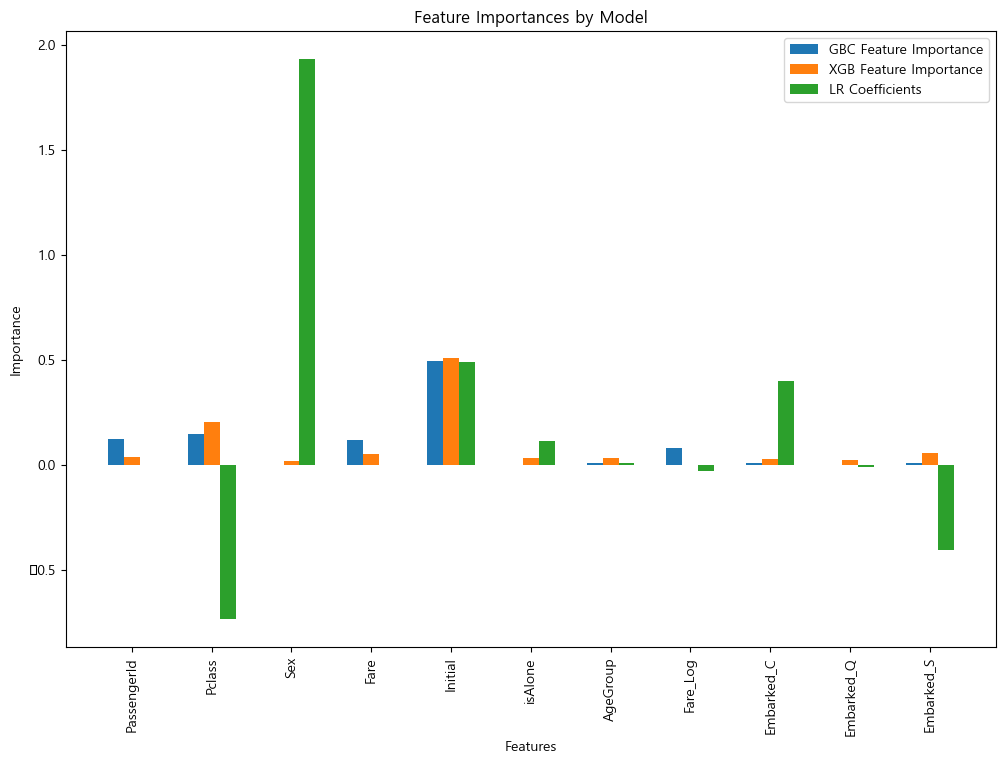

In [5560]:
# 특성 이름 (예시, 실제 데이터에 맞게 수정해야 함)
feature_names = x_train.columns

# 각 모델의 특성 중요도
gbc_importances = gbc.feature_importances_
xgb_importances = xgb.feature_importances_
lr_coefficients = lr.coef_[0]

# 그래프 그리기
feature_num = np.arange(len(feature_names))

plt.figure(figsize=(12, 8))

plt.bar(feature_num - 0.2, gbc_importances, 0.2, label='GBC Feature Importance')
plt.bar(feature_num, xgb_importances, 0.2, label='XGB Feature Importance')
plt.bar(feature_num + 0.2, lr_coefficients, 0.2, label='LR Coefficients')

plt.xticks(feature_num, feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances by Model')
plt.legend()

plt.show()